In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
#import cPickle
import numpy as np


In [165]:
messages_1 = pandas.read_csv('is_spam_train.csv', sep=',', quoting=csv.QUOTE_NONE)
messages_2 = pandas.read_csv('mail_features_test.csv', sep=',', quoting=csv.QUOTE_NONE)
messages_3 = pandas.read_csv('mail_features_train.csv', sep=',', quoting=csv.QUOTE_NONE)

In [166]:
messages = messages_3
messages["label"] = messages_1['"x"']

import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(messages, test_size = 0.2)

train_1 = train.drop("label", axis=1)
test_1 = test.drop("label", axis=1)
print(len(train))
print(len(test))

2944
737


In [167]:
model = LogisticRegression()
model.fit(train_1.values, train["label"])
labels = model.predict(test_1.values)
test["predicted_label"] = labels

matches = test["predicted_label"] == test["label"]
correct_predictions = test[matches]

accuracy = len(correct_predictions) / len(test)
print(accuracy)



0.9470827679782904


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


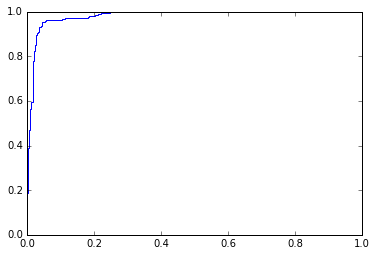

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

probabilities = model.predict_proba(test_1)
#print(probabilities)
fpr, tpr, thresholds = metrics.roc_curve(test["label"], probabilities[:,1])
plt.plot(fpr, tpr)
plt.show()

In [169]:
from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(test_1)

auc_score = roc_auc_score(test["label"], probabilities[:,1])
print(auc_score)

0.982128146453


In [148]:
labels_real = model.predict(messages_2.values)
messages_2['labels'] = labels_real

#messages_2['labels'].to_csv("output_moodle_1.csv", sep=",")

In [ ]:
final_test = pd.read_csv("testnew.csv", sep=',', quoting=csv.QUOTE_NONE)
final_test.drop("id", axis=1, inplace=True)
labels_real = model.predict(final_test.values)
final_test["labels"] = labels_real
final_test['labels']

#final_test['labels'].to_csv("output_kaggle_1.csv", sep=",")